Reference: https://becominghuman.ai/local-binary-pattern-features-for-texture-classification-d0dfd86ebf29

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
mcyt_df = pd.read_csv("/content/drive/MyDrive/SignatureVerificationCylab/MCYT_training.csv")

In [ ]:
mcyt_df

,Unnamed: 0,filename,user id,tag
0,0,u0001_g_0100v01.txt,u0001,g
1,1,u0001_g_0100v00.txt,u0001,g
2,2,u0216_g_0420v23.txt,u0216,g
3,3,u0216_g_0420v17.txt,u0216,g
4,4,u0216_g_0420v16.txt,u0216,g
...,...,...,...,...
11495,11495,u0015_s_0114f22.txt,u0015,s
11496,11496,u0015_s_0114f17.txt,u0015,s
11497,11497,u0016_g_0115v17.txt,u0016,g
11498,11498,u0016_g_0115v13.txt,u0016,g


In [ ]:
u0216_df = mcyt_df[mcyt_df["user id"] == "u0216"]

In [ ]:
def label_encoding(label):
  if label == "g":
    return 1
  elif label == "s":
    return 0

In [ ]:
u0216_df["tag"] = u0216_df["tag"].apply(label_encoding)

<ipython-input-7-357c2427656f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u0216_df["tag"] = u0216_df["tag"].apply(label_encoding)


In [ ]:
u0216_df

,Unnamed: 0,filename,user id,tag
2,2,u0216_g_0420v23.txt,u0216,1
3,3,u0216_g_0420v17.txt,u0216,1
4,4,u0216_g_0420v16.txt,u0216,1
5,5,u0216_g_0420v13.txt,u0216,1
6,6,u0216_g_0420v08.txt,u0216,1
7,7,u0216_g_0420v18.txt,u0216,1
8,8,u0216_g_0420v15.txt,u0216,1
9,9,u0216_s_0420f00.txt,u0216,0
10,10,u0216_g_0420v21.txt,u0216,1
11,11,u0216_g_0420v09.txt,u0216,1


In [ ]:
# cv2_imshow(thresholded_image)

In [ ]:
def preprocess_image(filename):
    path = "/content/drive/MyDrive/SignatureVerificationCylab/MCYT_from_DeepSign_Images"

    output_path = "/content/drive/MyDrive/SignatureVerificationCylab/deepsign_dataset_preprocessed/"
    if not os.path.exists(output_path):
      os.makedirs(output_path)

    image = cv2.imread(os.path.join(path, filename))


    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    image = cv2.resize(image, dsize=(600,300))

    # Perform Otsu's thresholding to get the optimal threshold value
    _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # print(image.shape)
    output_image_path = os.path.join(output_path, filename)
    # Save the binarized image to the output path
    # print(thresholded_image)
    cv2.imwrite(output_image_path, thresholded_image)




In [ ]:
path = "/content/drive/MyDrive/SignatureVerificationCylab/MCYT_from_DeepSign_Images"


In [ ]:
# os.listdir(path)

In [ ]:
#Binarize all images
for filename in u0216_df["filename"]:
  filename = filename.split(".")[0] + ".jpg"
  preprocess_image(filename)


In [ ]:

def get_images(df):
   counter = 0
   class_images = []
   for filename in df["filename"]:
       path = "/content/drive/MyDrive/SignatureVerificationCylab/deepsign_dataset_preprocessed/"
       filename = filename.split(".")[0] + ".jpg"
       image = cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)

      #  print(image.shape)

       class_images.append(image)


   return np.array(class_images)





In [ ]:
# signer_18

In [ ]:
signer_0216_preprocessed= get_images(u0216_df)
# signer_18_preprocessed= get_images(signer_18)

In [ ]:
signer_0216_preprocessed

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [ ]:
u0216_labels = u0216_df["tag"]

In [ ]:
len(u0216_labels)

50

In [ ]:
len(signer_0216_preprocessed)

50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(signer_0216_preprocessed, u0216_labels, test_size=0.3)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(signer_18_preprocessed, signer_18_labels, test_size=0.3)

In [ ]:
def extract_lbp(images):
    lbps = []
    for image in tqdm(images):
        lbp = local_binary_pattern(image, P=8, R=1)
        lbps.append(lbp)

    return np.array(lbps)

In [ ]:
X_train_lbp = extract_lbp(X_train)
X_test_lbp = extract_lbp(X_test)

100%|██████████| 15/15 [00:00<00:00, 33.65it/s]


In [ ]:
def create_histograms(images, sub_images_num, bins_per_sub_images):
    all_histograms = []
    for image in tqdm(images):
        grid = np.arange(0, image.shape[1]+1, image.shape[1]//sub_images_num)

        sub_image_histograms = []

        for i in range(1, len(grid)):
            for j in range(1, len(grid)):
                sub_image = image[grid[i-1]:grid[i], grid[j-1]:grid[j]]

                sub_image_histogram = np.histogram(sub_image, bins=bins_per_sub_images)[0]
                sub_image_histograms.append(sub_image_histogram)

        histogram = np.array(sub_image_histograms).flatten()
        all_histograms.append(histogram)

    return np.array(all_histograms)


In [ ]:
X_train_hist = create_histograms(X_train_lbp, sub_images_num=3, bins_per_sub_images=64)
X_test_hist = create_histograms(X_test_lbp, sub_images_num=3, bins_per_sub_images=64)

print('X_train_hist\t', X_train_hist.shape)
print('X_test_hist\t', X_test_hist.shape)

100%|██████████| 15/15 [00:00<00:00, 182.53it/s]

X_train_hist	 (35, 576)
X_test_hist	 (15, 576)


In [ ]:
model_svm = SVC()
model_svm.fit(X_train_hist, y_train)
svm_train_acc = model_svm.score(X_train_hist, y_train)
print('SVM train acc\t:', svm_train_acc)

# Make predictions on the test data
y_pred = model_svm.predict(X_test_hist)

# Calculate accuracy
svm_test_accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", svm_test_accuracy)




SVM train acc	: 0.5714285714285714
SVM Accuracy: 0.3333333333333333


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
model_knn.fit(X_train_hist, y_train)


print('KNN train acc\t:', model_knn.score(X_train_hist, y_train))

# Make predictions on the test data
y_pred = model_knn.predict(X_test_hist)

# Calculate accuracy
knn_test_accuracy = accuracy_score(y_test, y_pred)
print("KNN test Accuracy:", knn_test_accuracy)

# print('KNN test acc\t:', model_knn.score(X_test_hist, y_test))

KNN train acc	: 0.8857142857142857
KNN test Accuracy: 0.6666666666666666


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
random_forest.fit(X_train_hist, y_train)

print('Random Forest train acc\t:', random_forest.score(X_train_hist, y_train))

# Make predictions on the test data
y_pred = random_forest.predict(X_test_hist)

# Calculate accuracy
rf_test_accuracy = accuracy_score(y_test, y_pred)
print("Random forest Accuracy:", rf_test_accuracy)

print('Random Forest test acc\t:', random_forest.score(X_test_hist, y_test))


Random Forest train acc	: 1.0
Random forest Accuracy: 0.8
Random Forest test acc	: 0.8


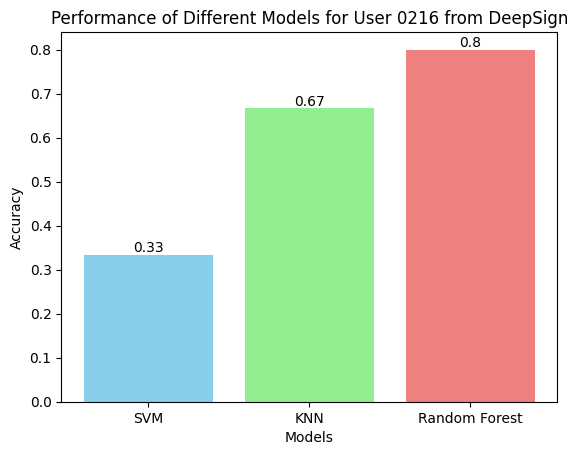

In [ ]:
import matplotlib.pyplot as plt

models = ['SVM', 'KNN', 'Random Forest']
accuracies = [svm_test_accuracy, knn_test_accuracy, rf_test_accuracy]
colors = ['skyblue', 'lightgreen', 'lightcoral']
# Plot the bar chart
plt.bar(models, accuracies , color= colors)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Performance of Different Models for User 0216 from DeepSign')

# Annotate each bar with its value (accuracy)
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{round(acc,2)}', ha='center', va='bottom')

# Show the bar chart
plt.show()
